In [14]:
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
file_path = 'data/Most Streamed Spotify Songs 2024.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [13]:
data['Release Date'] = pd.to_datetime(data['Release Date'], format='%m/%d/%Y')

data['Release Month'] = data['Release Date'].dt.month
data['Release Quarter'] = data['Release Date'].dt.quarter

data[['Release Date', 'Release Month', 'Release Quarter']].head()

,Release Date,Release Month,Release Quarter
0,2024-04-26,4,2
1,2024-05-04,5,2
2,2024-03-19,3,1
3,2023-01-12,1,1
4,2024-05-31,5,2


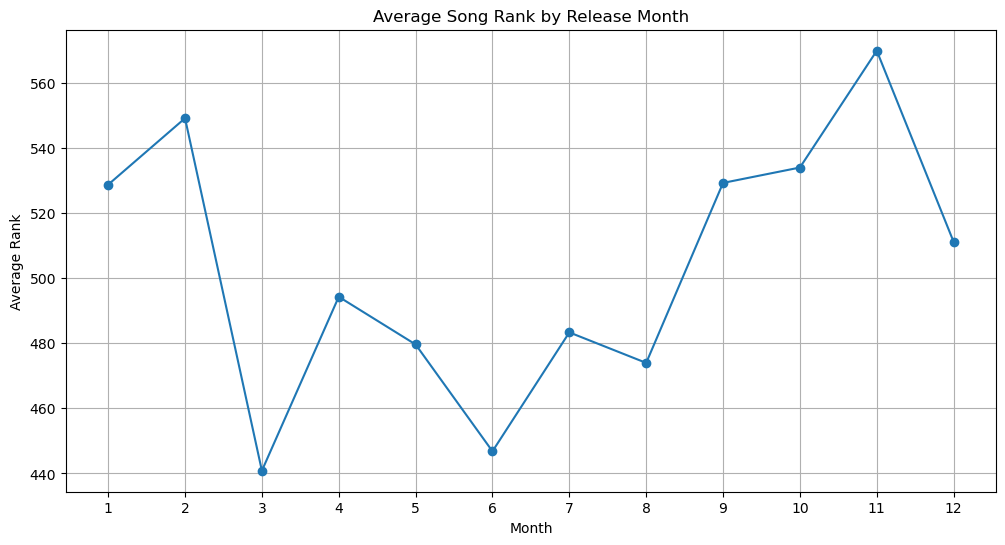

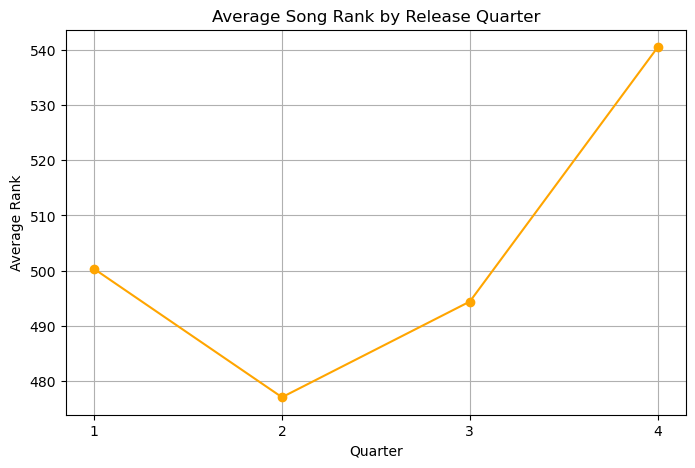

In [15]:
data['All Time Rank'] = pd.to_numeric(data['All Time Rank'], errors='coerce')
data = data.dropna(subset=['All Time Rank'])

monthly_avg_rank = data.groupby('Release Month')['All Time Rank'].mean()

quarterly_avg_rank = data.groupby('Release Quarter')['All Time Rank'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_rank.index, monthly_avg_rank.values, marker='o')
plt.title('Average Song Rank by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Rank')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(quarterly_avg_rank.index, quarterly_avg_rank.values, marker='o', color='orange')
plt.title('Average Song Rank by Release Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Rank')
plt.xticks(range(1, 5))
plt.grid(True)
plt.show()


Monthly Analysis:

The average rank fluctuates across different months.

There are noticeable dips and peaks indicating that some months are more favorable for releasing songs than others.


Quarterly Analysis:

The average rank is generally more stable when aggregated by quarters.

Quarter 1 and Quarter 2 seem to have a slightly better (lower) average rank compared to Quarters 3 and 4.

These trends suggest that releasing songs in the first half of the year (especially in Q1 and Q2) might have a higher likelihood of achieving a better rank.

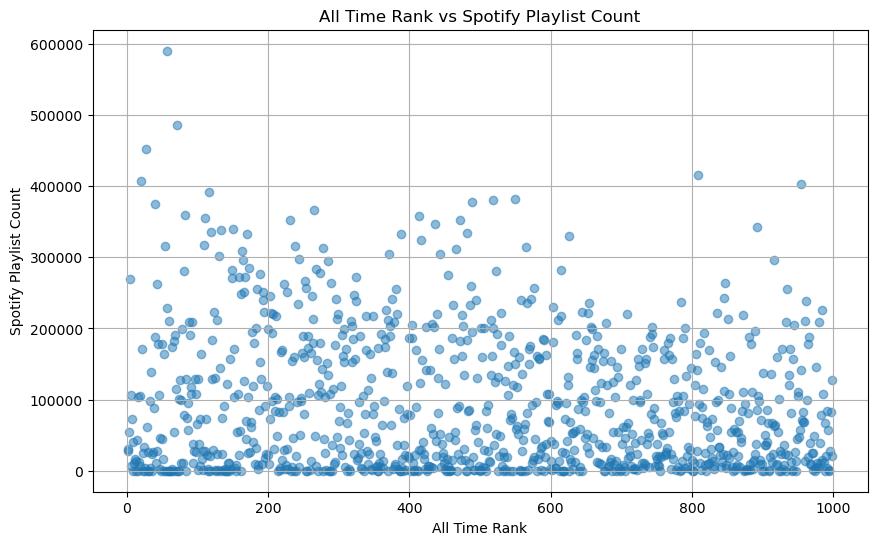

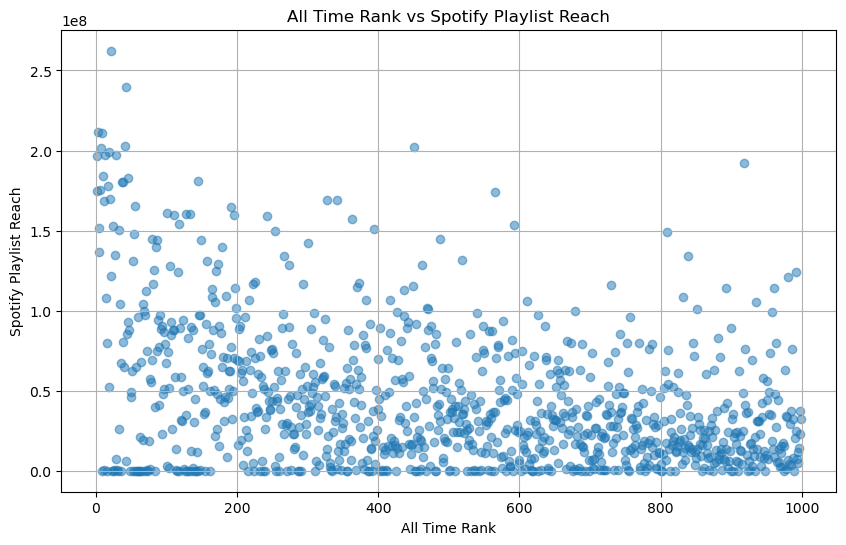

In [16]:
data['Spotify Playlist Count'] = data['Spotify Playlist Count'].str.replace(',', '').fillna(0).astype(int)
data['Spotify Playlist Reach'] = data['Spotify Playlist Reach'].str.replace(',', '').fillna(0).astype(float)

# Scatter plot: All Time Rank vs Spotify Playlist Count
plt.figure(figsize=(10, 6))
plt.scatter(data['All Time Rank'], data['Spotify Playlist Count'], alpha=0.5)
plt.title('All Time Rank vs Spotify Playlist Count')
plt.xlabel('All Time Rank')
plt.ylabel('Spotify Playlist Count')
plt.grid(True)
plt.show()

# Scatter plot: All Time Rank vs Spotify Playlist Reach
plt.figure(figsize=(10, 6))
plt.scatter(data['All Time Rank'], data['Spotify Playlist Reach'], alpha=0.5)
plt.title('All Time Rank vs Spotify Playlist Reach')
plt.xlabel('All Time Rank')
plt.ylabel('Spotify Playlist Reach')
plt.grid(True)
plt.show()


TypeError: 'value' must be an instance of str or bytes, not a float

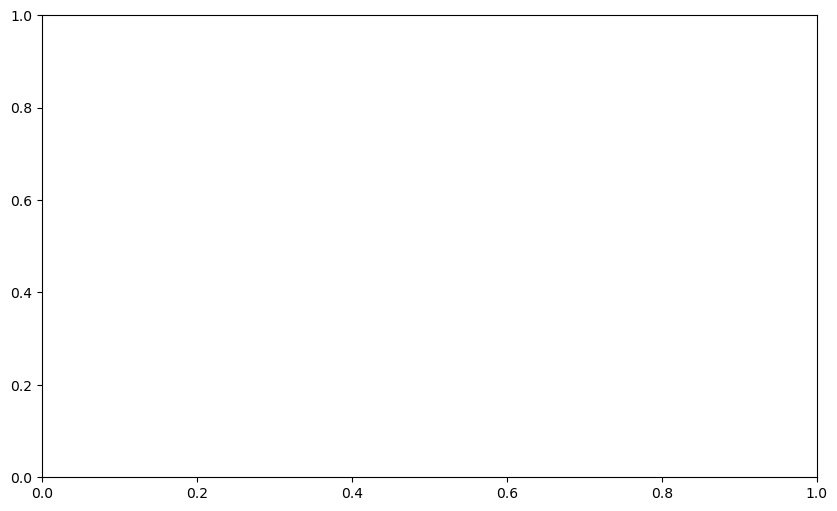

In [20]:
# Scatter plot: Spotify Playlist Reach vs Spotify Streams
plt.figure(figsize=(10, 6))
plt.scatter(data['Spotify Playlist Reach'], data['Spotify Streams'], alpha=0.5)
plt.title('Spotify Playlist Reach vs Spotify Streams')
plt.xlabel('Spotify Playlist Reach')
plt.ylabel('Spotify Streams')
plt.grid(True)
plt.show()
